# Spotify Analysis: Study of song factors and the positive correlation to streaming

## Members
- Joey Beightol
- Ryan Lucero
- Matthew Parker

## Table of Contents 

* Intro 
* Literature Review
* Original Research Question 
* Dataset 1 – Most Streamed Spotify Songs 2023 
* Data Wrangling and Cleaning for Datset 1 
* Visualization for Dataset 1 
* Dataset 1 Correlation and Analysis 
* Conclusions 
* Dataset 2 and Revised Research Question 
* Cleaning and Combining the Two Datasets 
* Analysis 
* Genre Correlation and Lasso Regression 
* Clustering 
* Conclusions 
* References 

# Intro

Over the past few decades, listening and creating music has become a lot more accesible. With this, more and more music is being created, more genres are being developed and more audiences are being reached. With everyone having their own taste in music, we want to explore what makes a song 'good' or 'succesful'. One way to measure success is the amount of streams a song has.

# Literature Review

Researchers at Carleton University concluded that song features to do not directly correlate to its popluarity, suggesting that contextual factors instead of musical features are stronger indicators of a songs success. Their study also suggestes that elements affecting song popularity change over time (https://newsroom.carleton.ca/story/big-data-predict-song-popularity/).

Researchers at Stanford University came to a similar conclusion. Using a different set of factors and a dataset of one milllion songs dating back to 2011, they found that sonic features of a song were far less predictive of it's popularity than its metadata features (https://cs229.stanford.edu/proj2015/140_report.pdf).


# Research Question and Task Definition
Our goal is to analyze what combination of surveyed factors (danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness, etc.) are most positively correlated with streams for a song on Spotify. We want to explore the conclusion drawn by Carleton and Stanford as well as see if song features correlate positively to streams based on contextual factors such as genre.

In our analysis, we are inputing the two datasets and creating a correlation matrix to see what aspects of songs cause the song to be listened to more (amount of streams). We are also conducting multiple different regression analysees on each genre to see exactly what features of a song lead to the highest streams.


# Dataset 1 - Most Streamed Spotify Songs 2023
- Most Streamed Spotify Songs 2023: This dataset is made up of the 943 most famous songs on Spotify for 2023 and was collected by Kaggle user Nidula Elgiriyewithana (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). 


The data was collected for exploratory analysis into patterns that may effect overall streams, popularity on specific platforms, trends in musical attributes or preferences etc. 

## Song Feature Details
The data set includes 24 different features:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song
- track_genre
- popularity



# Data Wrangling

## Import Libraries
The libraries being utilized in this project are:
- pandas: to create and easily manipulate dataframes
- numpy: combined with dataframes to check column information in dataframes
- matplotlib/seaborn: visualize data
- sklearn: utilized for regression tree analysis, lasso regression and mean squared error

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Load in Data

In [55]:
# Load data from a CSV file into a DataFrame
spotifyDF = pd.read_csv('spotify-2023.csv', encoding='latin-1')

## Data Cleaning

### Most Streamed 2023

First we want to take a look at what the dataset looks like. Get an understanding the scale we are dealing with

In [56]:
# Display the first few rows of the DataFrame
display(spotifyDF.head(3))

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6


Next, we want to drop the columns sharing the released year month and day. We deemed these values not necessary as these are not attributes of a song. It might be interesting to see what month is the best month to release a song to get the most streams, but that was not important for this analysis. We also dropped the columns relating to if a song was in a playlist or in the charts. These values have high correlation to the streams and we deemed it not a feature of the song.

In [57]:
#Drop columns
spotifyDF = spotifyDF.drop(columns=['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'])
#look at types
spotifyDF.dtypes

track_name            object
artist(s)_name        object
artist_count           int64
streams               object
bpm                    int64
key                   object
mode                  object
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
dtype: object

The feature 'streams' will be our response variable and it is noticed that the type is an object. It is important that all elements in this column are of the same type and that type to be an integer.

In [58]:
#Check if streams has any value that is not a number
spotifyDF['streams'] = pd.to_numeric(spotifyDF['streams'], errors='coerce')#convert all instances of streams column to numeric
spotifyDF = spotifyDF.dropna(subset=['streams']) #drop NaN from streams column
spotifyDF= spotifyDF.reset_index(drop=True)
spotifyDF['streams'] = spotifyDF['streams'].astype(int) #set type of streams column to int
spotifyDF.streams.dtypes #check to make sure streams is type integer

dtype('int64')

It is good practice to see mean, std, min, max and quartiles of the data to get a better understanding of each attriibute

In [59]:
#describe the dataframe
spotifyDF.describe()

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,5.141374e+08,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,5.668569e+08,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,1.416362e+08,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2.905309e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,6.738690e+08,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


The next part of cleaning is to look at ay null values

In [60]:
#Find all null values
spotifyDF.isnull().sum()

track_name             0
artist(s)_name         0
artist_count           0
streams                0
bpm                    0
key                   95
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
dtype: int64

It is noticed here that there are 95 instances of null values for key. This is an issue as key could be a strong feature of a songs success. We cannot remove these, but we have a solution that we utilize later in the analysis. The last part of our initial cleaning of the data is to remove any duplicates from the data. It is seen that there is 1 duplicate.

In [61]:
#Duplication
print(spotifyDF.duplicated().sum())
spotifyDF = spotifyDF.drop_duplicates() #remove duplicate
print(spotifyDF.duplicated().sum())

1
0


# Visualizations for Dataset 1

After cleaning the data, the first thing to do was to look at the data and do some exploratory analysis. We wanted to see how the song features related to streams. We ran various visualizations for different song features and the number of streams and there were no patterns of correlation visible

#### BPM and Streams

Total Streams


,streams
bpm,
120,17895005185
110,13894534171
95,13680509478
124,12020147720
92,11735704510


Average Streams


,streams
bpm,
171,2.409867e+09
179,1.735442e+09
186,1.718833e+09
181,1.256881e+09
111,1.230280e+09


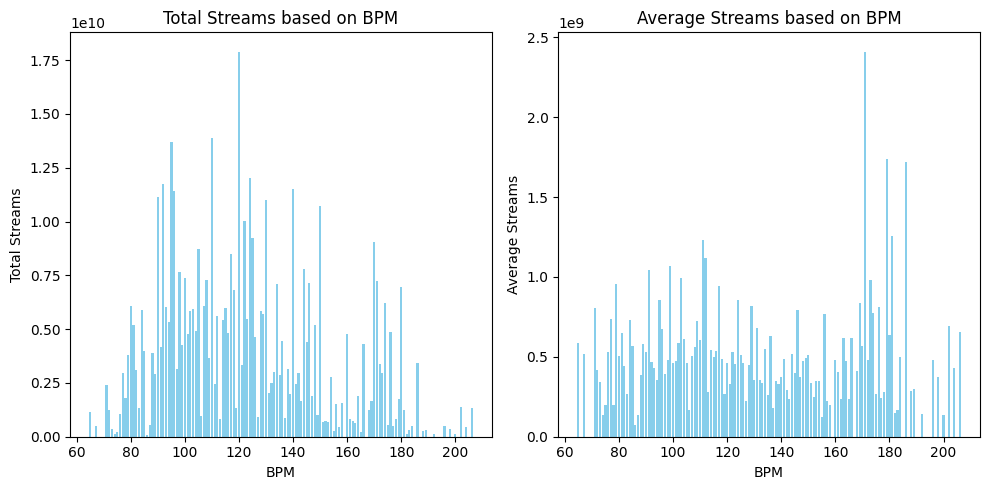

In [62]:
#Total streams based on BPM
bpmStreams = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='sum')
print('Total Streams')
display(bpmStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on BPM
bpmStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='mean')
print('Average Streams')
display(bpmStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. BPM
axs[0].bar(bpmStreams.index, bpmStreams['streams'], color='skyblue')
axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on BPM')
#Average streams vs. BPM
axs[1].bar(bpmStreamAvg.index, bpmStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('BPM')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on BPM')
# Adjust layout
plt.tight_layout()
# Show the plot

Total streams and bpm looks to be normally distributed but the average streams and bpm looks normally distributed between 60 bpm and 140 bpm and then a spike 170 bpm

#### Streams based on Speachiness

Total Streams


,streams
speechiness_%,
3,92691372688
4,86912744007
5,75037274364
6,37274060285
8,28158129113


Average Streams


,streams
speechiness_%,
2,1.468183e+09
44,1.155506e+09
18,8.654915e+08
37,7.983765e+08
28,7.914525e+08


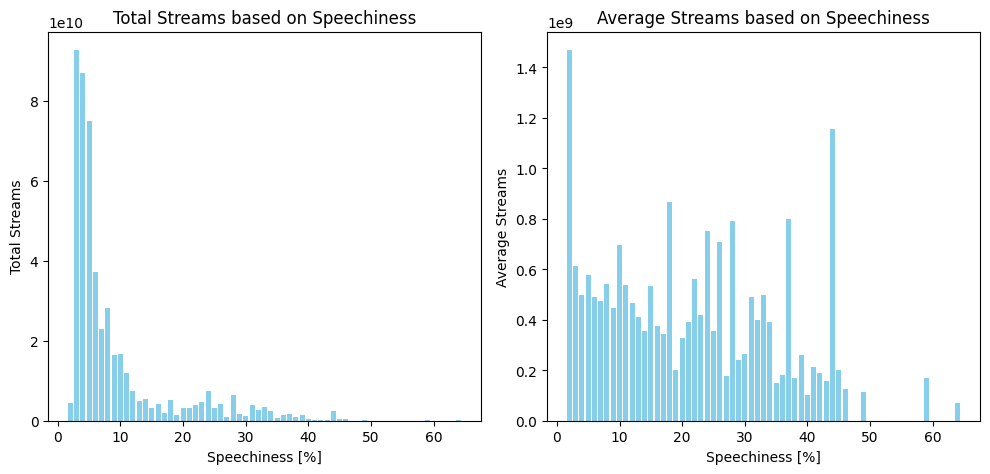

In [63]:
#Total streams based on speechiness
speechStreams = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='sum')
print('Total Streams')
display(speechStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on speechiness
speechStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='mean')
print('Average Streams')
display(speechStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. speechiness
axs[0].bar(speechStreams.index, speechStreams['streams'], color='skyblue')
axs[0].set_xlabel('Speechiness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Speechiness')
#Average streams vs. speechiness
axs[1].bar(speechStreamAvg.index, speechStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Speechiness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Speechiness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

Both total and average seem to be left skewed. Looks like less words in a song leads to more streams.

#### Key and Streams


Total Streams


,streams
key,
C#,72513629843
G,43449542493
G#,43398979639
D,42891570295
B,42067184540


Average Streams


,streams
key,
C#,6.042802e+08
E,5.774972e+08
D#,5.530365e+08
A#,5.494144e+08
D,5.295256e+08


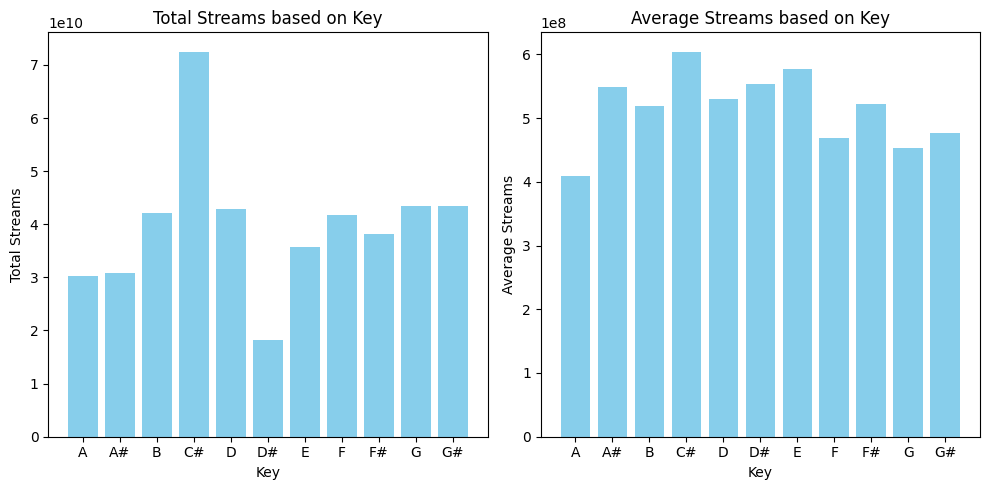

In [64]:

#Total streams based on Key
keyStreams = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='sum')
print('Total Streams')
display(keyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Key
keyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='mean')
print('Average Streams')
display(keyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Key
axs[0].bar(keyStreams.index, keyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Key')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Key')
#Average streams vs. Key
axs[1].bar(keyStreamAvg.index, keyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Key')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Key')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

Does not appear that the key has an effect on average streams. There might be some outliers for the key C# based on the spike in total streams.

#### Streams based on Valence

Total Streams


,streams
valence_%,
53,13350937560
24,13012155458
59,12422490055
40,10291153446
42,10175907784


Average Streams


,streams
valence_%,
12,1.239393e+09
93,1.141778e+09
95,1.113839e+09
38,1.005746e+09
6,9.772233e+08


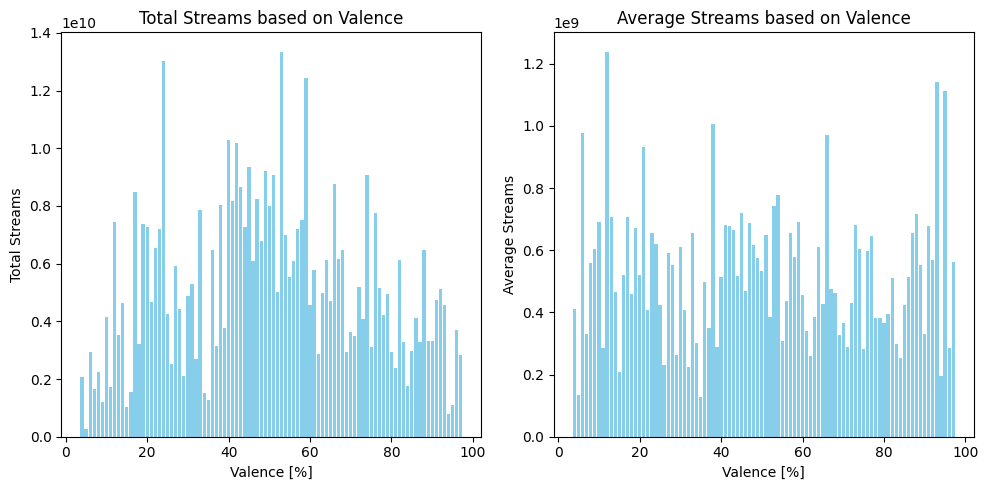

In [65]:

#Total streams based on Valence
valenceStreams = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='sum')
print('Total Streams')
display(valenceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Valence
valenceStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='mean')
print('Average Streams')
display(valenceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Valence
axs[0].bar(valenceStreams.index, valenceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Valence [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Valence')
#Average streams vs. Valence
axs[1].bar(valenceStreamAvg.index, valenceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Valence [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Valence')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


Nothing really indicative of valence at first glance. Seems to be normally distributed for total streams and steady for average.


#### Streams based on Energy

Total Streams


,streams
energy_%,
52,16318154539
66,16246259545
80,15426210945
73,13635516588
65,13214175739


Average Streams


,streams
energy_%,
93,1.305763e+09
27,1.102825e+09
26,1.098487e+09
52,9.065641e+08
38,8.869762e+08


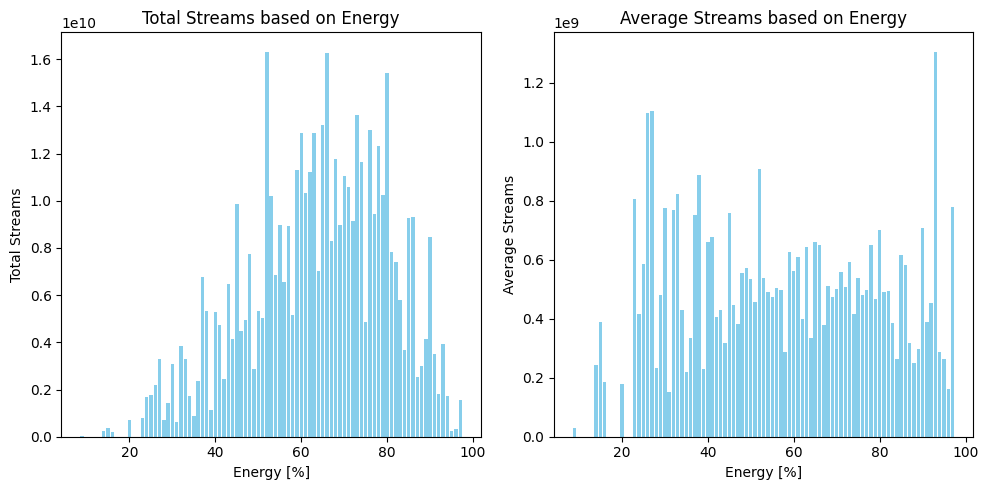

In [66]:

#Total streams based on Energy
energyStreams = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='sum')
print('Total Streams')
display(energyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Energy
energyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='mean')
print('Average Streams')
display(energyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Energy
axs[0].bar(energyStreams.index, energyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Energy [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Energy')
#Average streams vs. Energy
axs[1].bar(energyStreamAvg.index, energyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Energy [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Energy')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


Energy and total streams looks to be right skewed meaning the higher the energy, the more streams.


#### Streams Based on Accousticness

Total Streams


,streams
acousticness_%,
0,35257328063
1,30042319809
4,22082865867
2,21192795430
9,19243481735


Average Streams


,streams
acousticness_%,
58,1.662174e+09
63,1.521946e+09
54,1.431395e+09
93,1.240064e+09
68,1.230856e+09


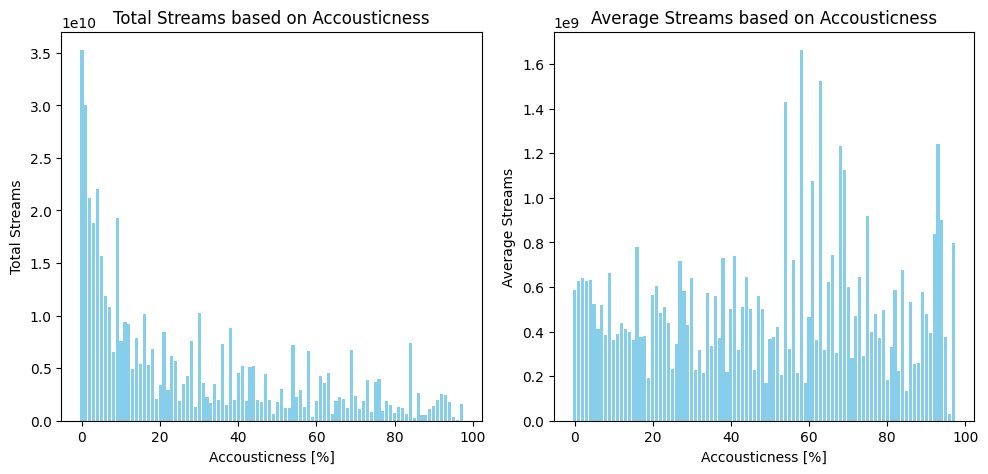

In [67]:

#Total streams based on Accousticness
accStreams = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='sum')
print('Total Streams')
display(accStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Accousticness
accStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='mean')
print('Average Streams')
display(accStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Accousticness
axs[0].bar(accStreams.index, accStreams['streams'], color='skyblue')
axs[0].set_xlabel('Accousticness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Accousticness')
#Average streams vs. Accousticness
axs[1].bar(accStreamAvg.index, accStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Accousticness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Accousticness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


Acousticness is left skewed for total streams meaning, the less acoustic a song, the more streams.


#### Streams based on liveness

Total Streams


,streams
liveness_%,
9,57524747506
11,47361568889
10,44724857409
12,29886192101
8,27911697463


Average Streams


,streams
liveness_%,
64,1.385757e+09
42,9.638291e+08
46,8.710787e+08
50,8.437020e+08
45,7.814507e+08


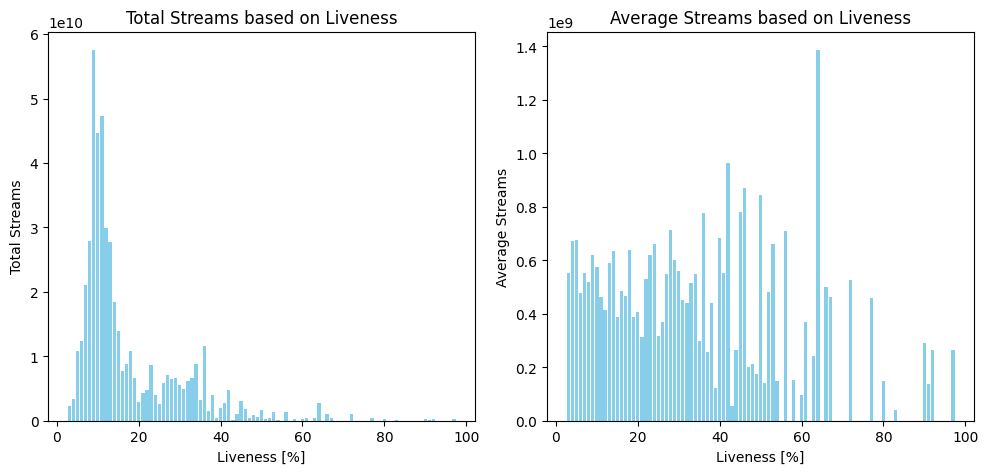

In [68]:

#Total streams based on liveness
livenessStreams = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='sum')
print('Total Streams')
display(livenessStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on liveness
livenessStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='mean')
print('Average Streams')
display(livenessStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. liveness
axs[0].bar(livenessStreams.index, livenessStreams['streams'], color='skyblue')
axs[0].set_xlabel('Liveness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Liveness')
#Average streams vs. liveness
axs[1].bar(livenessStreamAvg.index, livenessStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Liveness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Liveness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

Similar to acousticness, liveness is left skewed which is interesting. One would think liveness should be right-skewed

# Dataset 1 Correlation and Analysis 

### Analysis of Data: Correlation
Before running correlation and regression analysis, it is important to clean the data further. First we need to encode the key values so they can be included in the correlation. Secondly, we need to standardize the data since the features are all on different scales. It is important to give each feature equal weight.

In [69]:
#Encode the data
label_encoder = LabelEncoder() #set encoder
spotifyDF['key_encoded'] = label_encoder.fit_transform(spotifyDF['key']) #create new column of encoded keys
#Standardize the data
spotifyNumericDF = spotifyDF.select_dtypes(include=['int', 'float']) #Select only numerical columns
scaler = StandardScaler() #set scaler
spotifyNumericStandard = pd.DataFrame(scaler.fit_transform(spotifyNumericDF), columns=spotifyNumericDF.columns) #standardize the data
spotifyNumericStandard.head(3) #display standardized dataframe

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,0.495653,-0.657242,0.086659,0.891442,1.602621,1.131712,0.15015,-0.188337,-0.743878,-0.619469,-1.063078
1,-0.623981,-0.670765,-1.089135,0.275883,0.409660,0.588086,-0.77308,-0.188337,-0.597987,-0.619469,-0.779332
2,-0.623981,-0.659672,0.549850,-1.092025,-0.825906,-0.680374,-0.38840,-0.188337,0.933875,-0.417752,0.355652


With the data standardized, now want to look at correlation

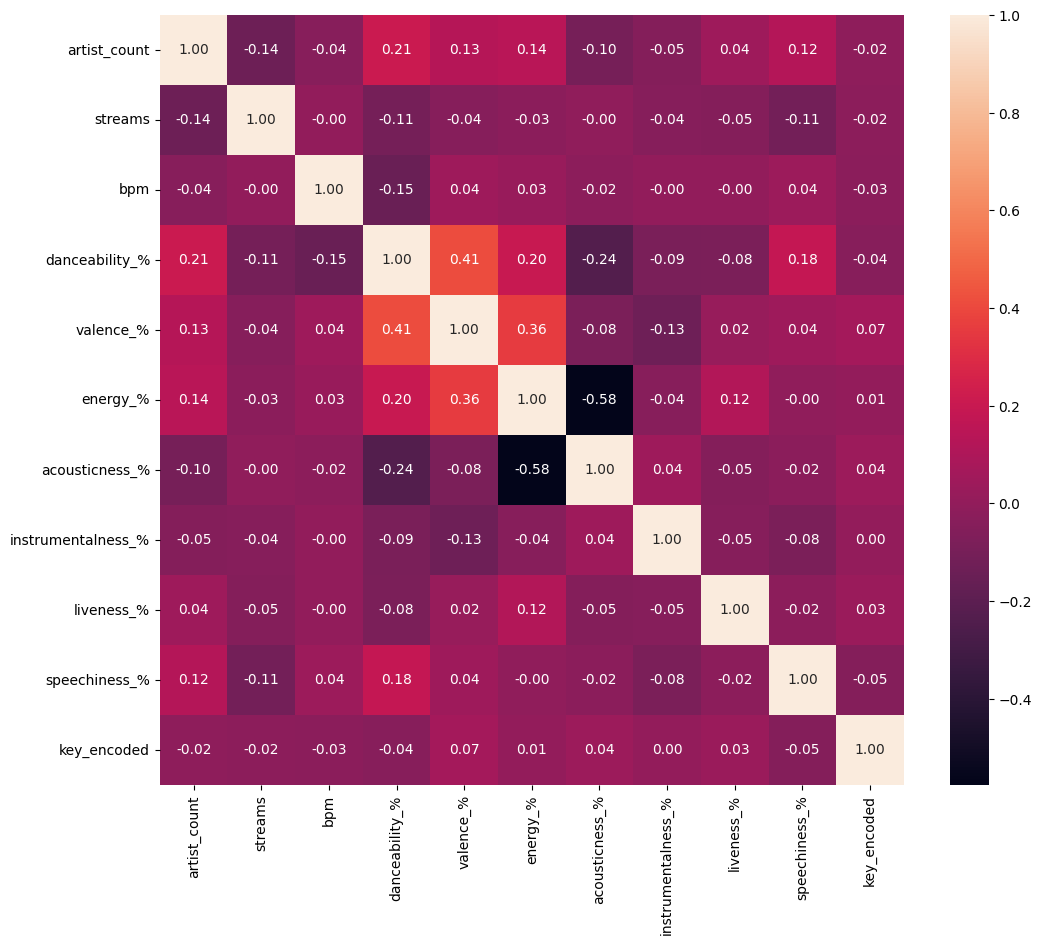

In [70]:
# Set the size of the figure
plt.figure(figsize=(12, 10))
sns.heatmap(spotifyNumericStandard.corr(), annot=True, fmt=".2f") #correlation heat map of standardized data
# Show the plot
plt.show()

Does not look like there is any correlation with the number of streams and the features of songs. Next step would be to utilize Lasso cross validation to get which features are the strongest predictors of the outcome variable, streams. Cross validation partitions the dataset into multiple subsets, called folds, and iteratively trains and evaluates the model on different combinations of these folds. The primary goal of cross-validation is to obtain an unbiased estimate of the model's performance on unseen data.

### Analysis of Data: Lasso Regression and Decision Tree

In [71]:
#Train the model
X = spotifyNumericStandard.drop('streams', axis=1) #set predictors
y = spotifyNumericStandard['streams'] #set response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train model on 80% train and 20% test with random state for repeatability
#Lasso Regression
lasso_cv = LassoCV(cv=5)  #use 5-fold cross-validation
lasso_cv.fit(X_train, y_train) #fit model
print("Best alpha:", lasso_cv.alpha_) #print best alpha from cross validation
y_pred = lasso_cv.predict(X_test) #make prediction
mse = mean_squared_error(y_test, y_pred) #get MSE
print("Mean Squared Error:", mse)

coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_}) #grab lasso coefficients
print(coeffDF)
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0] #only select coeffs greater than 0
negFeat = negCoeffDF['Feature'].tolist()
spotifyLassoRegDF = spotifyNumericStandard[negFeat + ['streams']] #create new df with only lasso coeffs

Best alpha: 0.02952155165654929
Mean Squared Error: 0.749770051505896
              Feature  Coefficient
0        artist_count    -0.079182
1                 bpm    -0.000000
2      danceability_%    -0.034707
3           valence_%     0.000000
4            energy_%     0.000000
5      acousticness_%    -0.000000
6  instrumentalness_%    -0.026348
7          liveness_%    -0.045496
8       speechiness_%    -0.093412
9         key_encoded    -0.000000


It is noticed that artist count, danceability, instrumentalness, liveness and speechiness are the strong predictors according to Lasso. It is important to note that positive relations mean that feature is directly related to streams while a negative value indicates that features in inversely related to streams.

In [72]:

#Train model
X =  spotifyLassoRegDF.drop('streams', axis=1) #set predictors
y = spotifyLassoRegDF['streams'] #set response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train test set

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 0.7527008209059232
Random Forrest Mean Squared Error: 0.8710600853353992
Tree Regression Mean Squared Error: 1.3179222263707664


Looking at the MSE for each regression analysis, it shows that the model is not very predictive. We would want a MSE closer to 0 and with a MSE close to 1 or above shares that the model is not very accurate. To show this, we provided a regression tree.

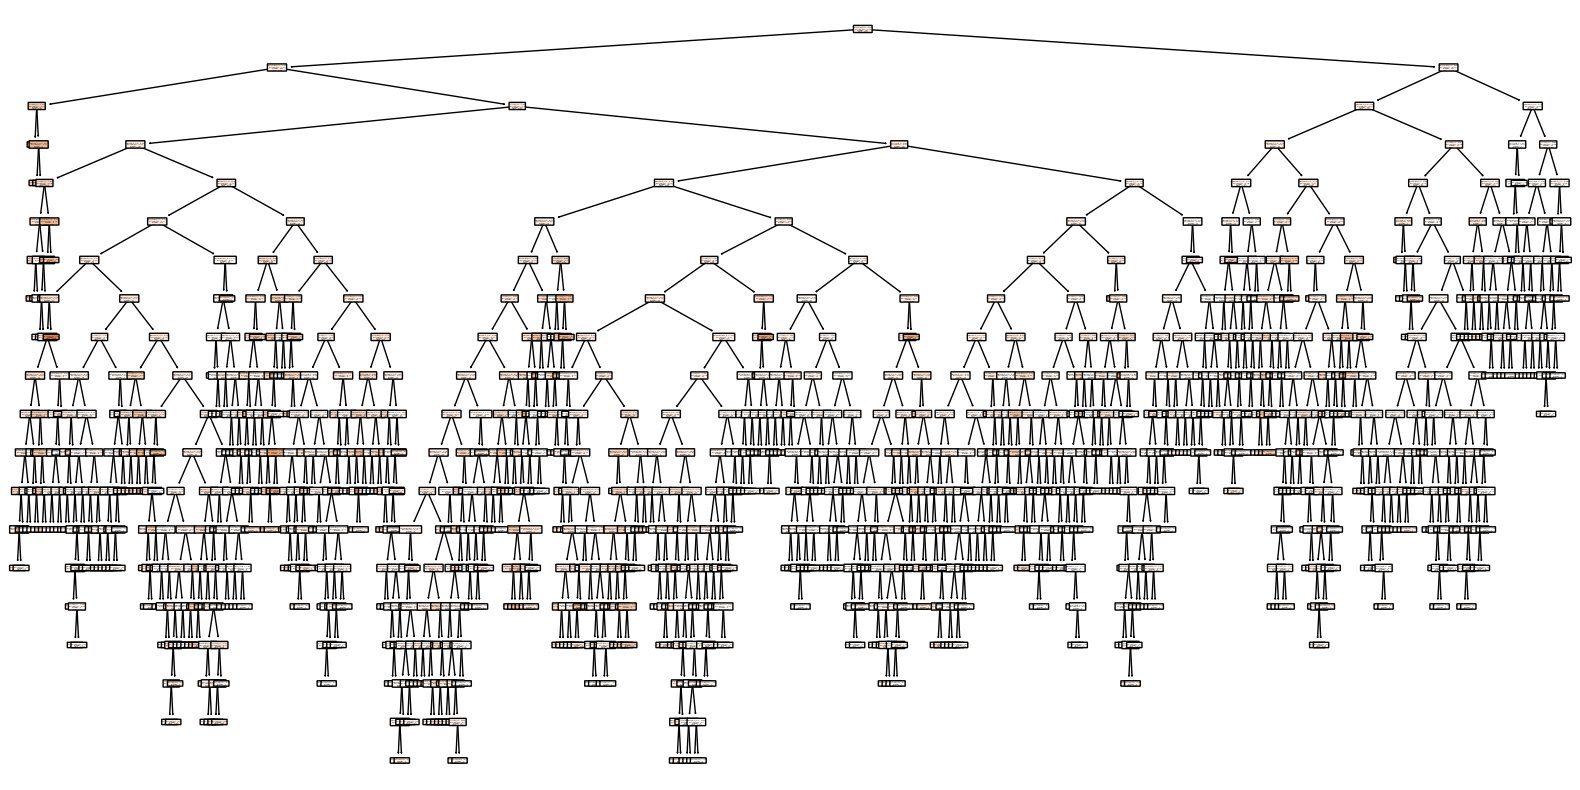

In [73]:
# Visualize the decision tree just for fun
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()


This regression tree is massive. This shows us that are model is not very predicitve and needs a lot of leaf nodes to split the data. Ideally, we would want to prune this into less categories.

# Conclusions from Dataset 1 Exploration and Analysis

Our analysis showed that there was no correlation between individual song features and streams. This is the same conclusion that both Stanford and Carleton University researchers came to. We decided to find another dataset with genre information for songs, and to see if we could find any correlation between songs of specific genres and what muscial features make those songs successful.

# Dataset 2 - Spotify Tracks Dataset
- Spotify Tracks Dataset: This dataset is made up of spotify tracks ranging over 125 different genres. (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [74]:
# Reading in Dataset 2
spotifyLargeDF = pd.read_csv('spotify_large.csv', encoding='latin-1')
# Display the first few rows of the DataFrame
display(spotifyLargeDF.head(3))

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


Similarly to before, we want to look at the mean, standard deviation, min, max and quartiles of the new dataset that includes genre.

In [75]:
#describe the dataframe
spotifyLargeDF.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [76]:
#look at types
spotifyLargeDF.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Next, it is important to see if there is any null values in the new dataset. There is only a few nulls, but we aren't running analysis on this dataset alone. We want to use this new dataset to add genres to the one we already looked at so it is not a completely different analysis.

In [77]:
#Find all null values
spotifyLargeDF.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [78]:
#Duplication
spotifyLargeDF.duplicated().sum()

0

# Combining Datasets 1 and 2
As mentioned above, we want to merge the two datasets. Specifically, we want to utilize a left join on the previous 2023 top tracks dataset and join the new dataset to add the columns for popularity and genre. In order to do this, we need to join on something that is unique between the two datasets. There is no ID that is specific to each song, so what we ended up doing is joining where the artist name and track name matched. Before merging however, it is important to make sure that the two columns in each dataset that we are joinng set up the same. This is done below.


In [79]:
#adjust data frames to match
spotifyDF.rename(columns={'artist(s)_name': 'artists'}, inplace=True) #make sure artist column is labeled the same
spotifyLargeDF.rename(columns={'key': 'large_key'}, inplace=True) #make sure key column is labeled the same
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].str.replace(';', ', ') #change artist separation character to be hte same
spotifyDF['artists'] = spotifyDF['artists'].astype(str) #convert artist column type to string
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].astype(str) #convert artist column type to string

Now that we have cleaned the data, it is time to merge the two datasets into one.

In [80]:
#merge dataframes
spotifyCombined = pd.merge(spotifyDF, spotifyLargeDF[['artists', 'track_name','track_genre', 'popularity', 'large_key']], on=['artists','track_name'])
spotifyCombined.head(3) #display first few rows

,track_name,artists,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,track_genre,popularity,large_key
0,As It Was,Harry Styles,1,2513188493,174,F#,Minor,52,66,73,34,0,31,6,8,pop,95,6
1,As It Was,Harry Styles,1,2513188493,174,F#,Minor,52,66,73,34,0,31,6,8,pop,92,6
2,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11,garage,92,0


As seen even in the first few rows, there seem to be duplicates. We need to remove these duplicates from the data as this would lead to skewed results in the analysis.

In [81]:
#remove duplicates
print(spotifyCombined.duplicated().sum())
spotifyCombined = spotifyCombined.drop_duplicates(subset=['artists', 'track_name'])
print(spotifyCombined.duplicated().sum())

416
0


After removing the duplicates, it is important to check the null values. Handling these null values properly is very important.

In [82]:
spotifyCombined.isnull().sum()

track_name             0
artists                0
artist_count           0
streams                0
bpm                    0
key                   31
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
key_encoded            0
track_genre            0
popularity             0
large_key              0
dtype: int64

## Feature Engineering on Key

We see that there are 31 null values in key. Key could possibly be a important feature for a song so it is important how we handle these. We don't want to remove these null values, as these instances may be impactful. We notice from the large genre dataset, there are no missing key values. Therefore, we create a dictionary of key value pairs for the encoded key value provided from the large dataset and the respective string value. We use this to fill the null values of the key value.

In [83]:
#Create function to replace all keys
keyNull = spotifyCombined['key'].isnull() #create df of null key values
spotifyCombined.loc[keyNull, 'key'] = spotifyCombined.loc[keyNull, 'large_key'] #place the null value of key with the encoded value of large key
#create key dictionary
keyDict = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}
spotifyCombined['key'] = spotifyCombined['key'].replace(keyDict) #replace all values of integers to strings in key column from dictionary
spotifyCombined.drop('large_key', axis=1, inplace=True) #drop large key column as it is not necessary
spotifyCombined.isnull().sum() #print out any null values

track_name            0
artists               0
artist_count          0
streams               0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
key_encoded           0
track_genre           0
popularity            0
dtype: int64

There are no longer any null values! Now let's encode the keys so we can use them in analysis

In [84]:
#Encode keys
label_encoder = LabelEncoder() #set label encoder
spotifyCombined['Encoded_key'] = label_encoder.fit_transform(spotifyCombined['key']) #encode keys

Starting our analysis of what makes a song successful based on genre, we want to see how many songs are in each dataset. When we merged the two datasets, the combined dataset shrunk significantly. There are only 253 instances of the combined dataset, and if we split this into separate dataframes based on genre, that becomes even smaller. We can see that below

In [85]:
print(spotifyCombined['track_genre'].value_counts())

track_genre
pop                  46
dance                39
hip-hop              27
k-pop                21
latin                14
latino               14
indie-pop            13
rock                  6
electro               5
alt-rock              5
piano                 5
garage                5
british               5
singer-songwriter     4
funk                  4
indie                 3
soul                  3
folk                  3
hard-rock             3
anime                 3
synth-pop             2
german                2
country               2
alternative           2
emo                   2
reggae                2
rock-n-roll           1
edm                   1
j-rock                1
grunge                1
blues                 1
indian                1
jazz                  1
rockabilly            1
disco                 1
ambient               1
chill                 1
french                1
r-n-b                 1
Name: count, dtype: int64


While this is not ideal, lets take a look at the top 8 genres with the most value counts

# Visualizing Combined Data

#### Artist Streams

In [86]:
#artist streams
artistStreams = pd.pivot_table(spotifyCombined, values='streams', index='artists', aggfunc='sum')
display(artistStreams.sort_values(by='streams',ascending=False).sample(15))

,streams
artists,
Lewis Capaldi,2887241814
Alec Benjamin,1374581173
Sidhu Moose Wala,183273246
One Direction,1131090940
Taylor Swift,3657933592
Olivia Rodrigo,5852672803
King,319566866
Charlie Puth,646703472
Queen,2197010679


In [87]:
##Splitting streams up on songs with multiple artists
artist_split = spotifyCombined.assign(artist=spotifyCombined['artists'].str.split(',')).explode('artists')
artist_split = artist_split[['artist', 'streams']]
artist_split = artist_split.explode('artist')
artist_split.sample(15)

,artist,streams
37,Feid,674072710
819,JVKE,346127840
113,Taylor Swift,607123776
316,Bad Bunny,671365962
189,Ed Sheeran,3562543890
926,Charlie Puth,146363130
632,Doja Cat,672656250
948,Bad Bunny,283359161
353,Shakira,606361689
273,Ed Sheeran,1302184087


In [88]:
'''Calculating an Artist's Number of Streams per Song in the Dataset'''
avg_streams_per_artist = artist_split.groupby('artist')['streams'].mean()
avg_streams_per_artist = pd.DataFrame(avg_streams_per_artist).sort_values('streams', ascending=False)
avg_streams_per_artist

,streams
artist,
Lewis Capaldi,2.887242e+09
Halsey,2.591224e+09
Daft Punk,2.565530e+09
Glass Animals,2.557976e+09
James Arthur,2.420461e+09
...,...
Nessa Barrett,1.317462e+08
David Kushner,1.244074e+08
Halsey,9.178126e+07


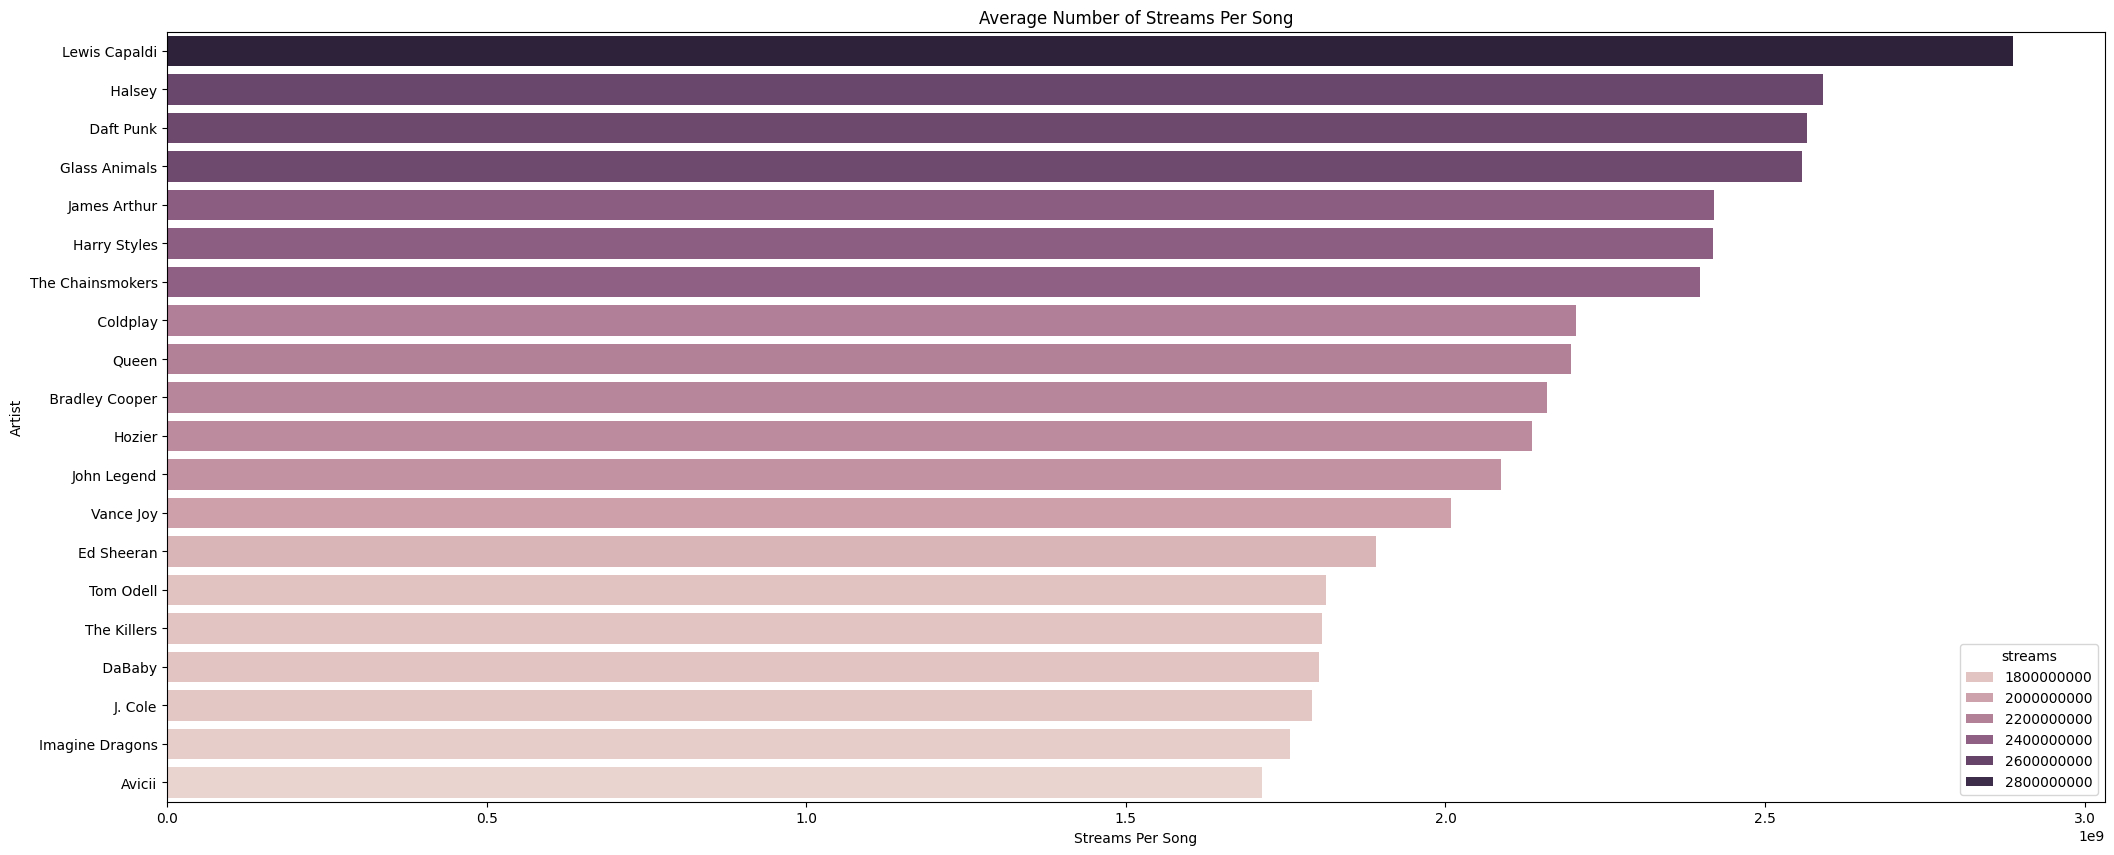

In [89]:
top_20_streams = avg_streams_per_artist.head(20)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=top_20_streams, x='streams', y='artist', hue='streams', orient='h')
plt.ylabel('Artist')
plt.xlabel('Streams Per Song')
plt.title('Average Number of Streams Per Song')
plt.show()

#### Genre Streams

In [90]:
genre_streams = spotifyCombined.groupby('track_genre')['streams'].sum()
genre_streams = pd.DataFrame(genre_streams).sort_values('streams', ascending=False)
genre_streams.head()

,streams
track_genre,
pop,66953492491
dance,38117856266
hip-hop,21479303562
rock,9234944972
latin,9077793651


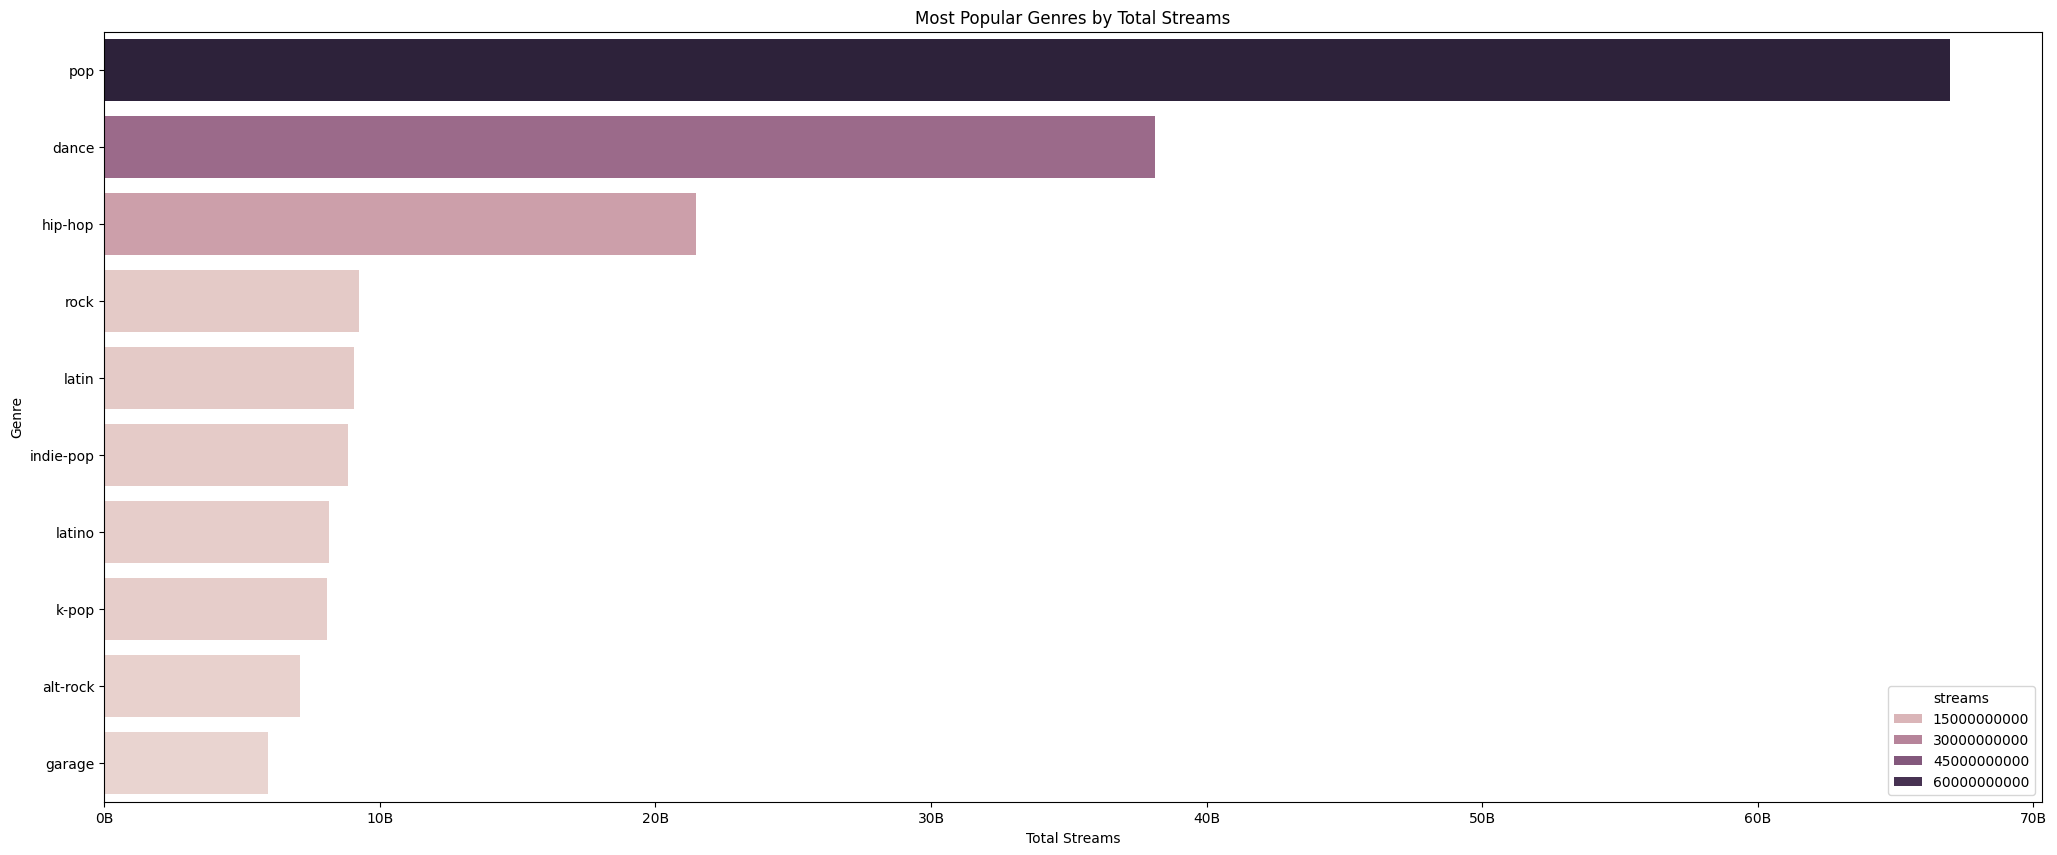

In [91]:
#formatter for visualization
def billions_formatter(x, pos):
  return f"{x / 1e9:,.0f}B"

fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=genre_streams.head(10), y='track_genre', x='streams', hue='streams', orient='h')
plt.xlabel('Total Streams')
plt.ylabel('Genre')
plt.title('Most Popular Genres by Total Streams')
plt.gca().xaxis.set_major_formatter(billions_formatter)
plt.show()

#### Relationship Between Popularity and Streams

It is not understood what aspects go into making a song popular, so let's see if there is a relation between popularity and streams

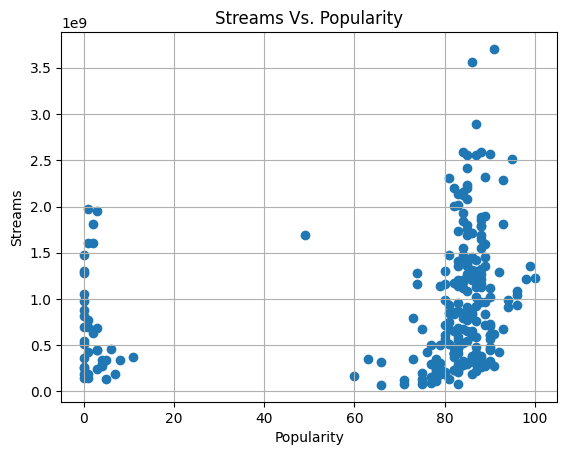

In [92]:
# Plotting
plt.scatter(spotifyCombined['popularity'], spotifyCombined['streams'], marker='o')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.title('Streams Vs. Popularity')

# Display the plot
plt.grid(True)
plt.show()

It looks like there are a lot of outliers when 0 poplar songs have a lot of streams. Let's take a look at only 50 popularity and above

0.3558464953631708
(213, 18)


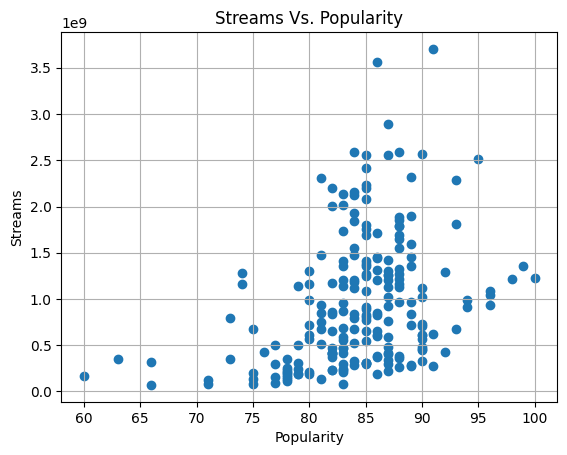

In [93]:

# Plotting
popularDF = spotifyCombined[spotifyCombined['popularity'] > 50]
corrCoef = np.corrcoef(popularDF['popularity'], popularDF['streams'])[0, 1]
print(corrCoef)
print(popularDF.shape)
plt.scatter(popularDF['popularity'], popularDF['streams'], marker='o')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.title('Streams Vs. Popularity')

# Display the plot
plt.grid(True)
plt.show()

The correlation seems to be low and looking at the graph, it looks to be exponential. Let's check non-linear relationshop

# Combined Analysis

#### Check non-linear

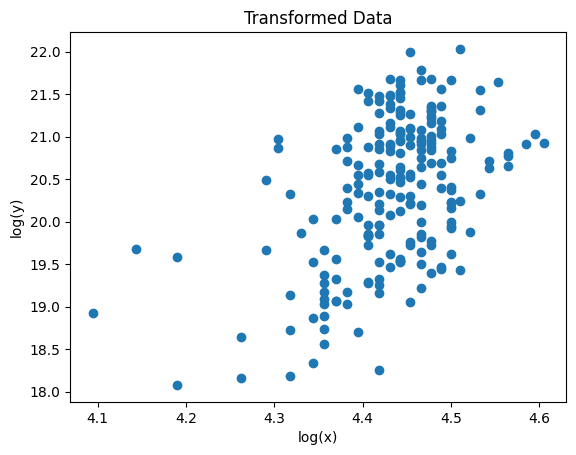

Correlation Coefficient: 0.4744610005717168
Curve Fitting Parameters: [-4.40275921e-21  9.99999993e-01]


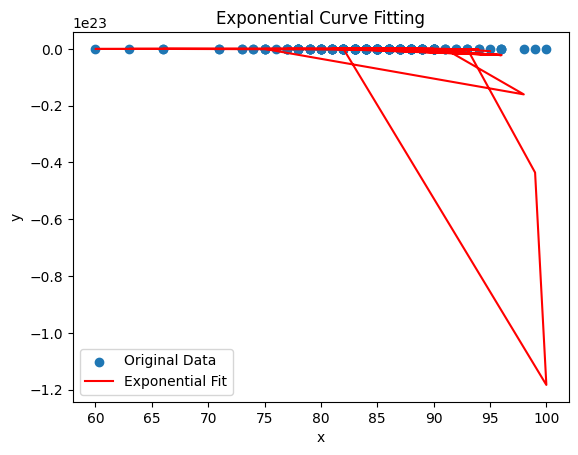

In [94]:
x = spotifyCombined.loc[spotifyCombined['popularity'] > 50, 'popularity']
y = spotifyCombined.loc[spotifyCombined['popularity'] > 50, 'streams']
# 2. Transform the Data
x_log = np.log(x)
y_log = np.log(y)
plt.scatter(x_log, y_log)
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Transformed Data')
plt.show()

# 3. Correlation Analysis
correlation_coefficient, _ = pearsonr(x_log, y_log)
print("Correlation Coefficient:", correlation_coefficient)

# 4. Curve Fitting
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_func, x, y)
print("Curve Fitting Parameters:", params)

# Plot the curve fitting
plt.scatter(x, y, label='Original Data')
plt.plot(x, exponential_func(x, *params), color='red', label='Exponential Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve Fitting')
plt.legend()
plt.show()

Better, but still not great. Lets run analysis per genre

## Analysis per Genre

In [95]:
#Drop key and popularity
spotifyCombined = spotifyCombined.drop(['key', 'popularity'], axis=1)

Similarly from before, lets standardize the data

In [96]:
#standardize the data
spotifyCombinedNumericDF = spotifyCombined.select_dtypes(include=['int', 'float']) #select only numerical columns
scaler = StandardScaler() #set scaler
spotifyCombinedStandard = pd.DataFrame(scaler.fit_transform(spotifyCombinedNumericDF), columns=spotifyCombinedNumericDF.columns) #standardize the data
spotifyCombinedStandard.head(3)

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,Encoded_key
0,-0.406223,2.296281,1.777979,-0.847535,0.743558,0.521659,0.382610,-0.190961,1.028333,-0.352098,0.639165,1.058738
1,-0.406223,0.539031,0.447529,-1.107131,-0.253706,-1.379536,-0.454829,0.039651,-0.538474,-0.719189,1.472716,-0.688180
2,-0.406223,0.624183,-0.882922,0.645143,0.335587,0.215015,-0.569025,-0.190961,-0.381793,-0.352098,0.361315,0.767585


## Individual Genre Analysis

### Pop Genre

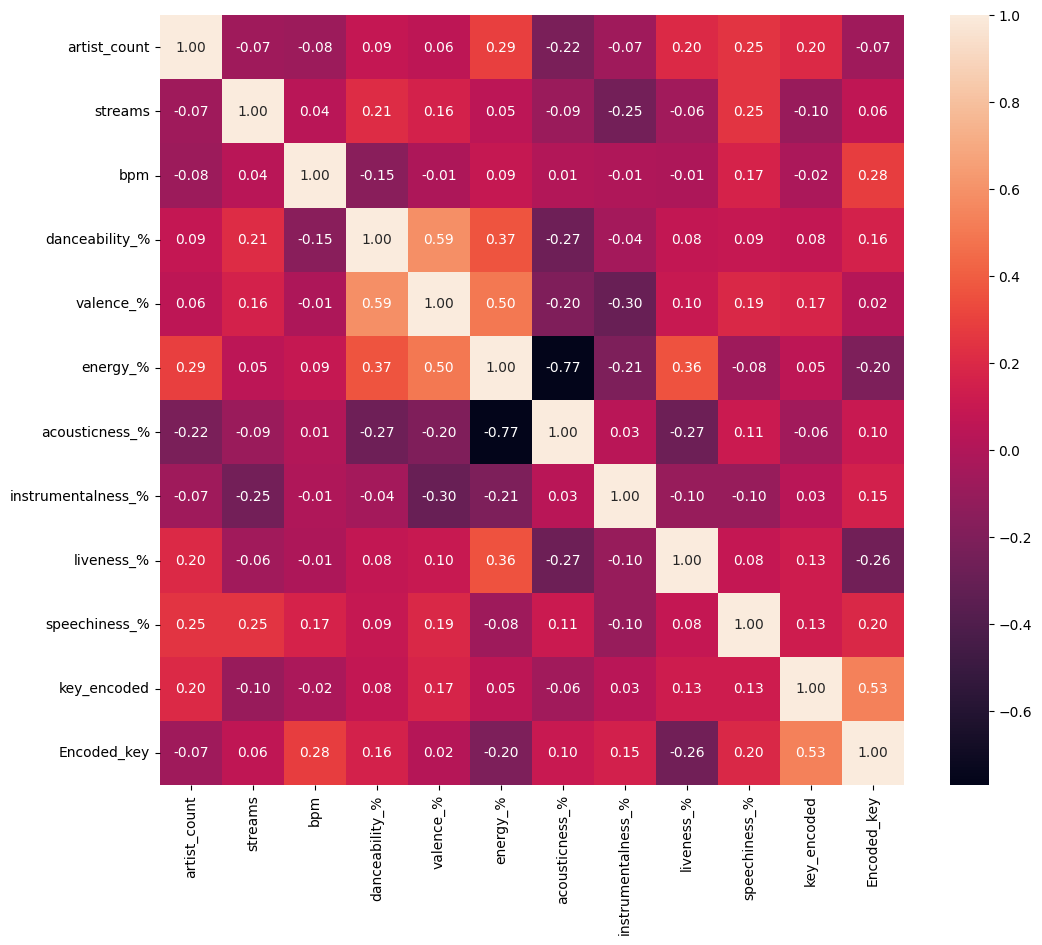

In [97]:
#Create df based only on pop genre
popDF = spotifyCombined[spotifyCombined['track_genre'].isin(['pop'])]
popDF = popDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
popStandard = pd.DataFrame(scaler.fit_transform(popDF), columns=popDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(popDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

The correlation for streams is definitely higher than our previous analysis, but it is still not indicative that there is a high relation for any song feature and the number of streams. Similarly, let's use Lasso Cross Validation to select the best coefficents

In [98]:
#Train the model
X = popStandard.drop('streams', axis=1) #select predictors
y = popStandard['streams'] #select response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #train the model
#Lasso 
lasso_cv = LassoCV(cv=5)  #use 5-fold cross-validation
lasso_cv.fit(X_train, y_train) #fit the data
print("Best alpha:", lasso_cv.alpha_) #print best alpha

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
popLasso = popStandard[negFeat + ['streams']]

Best alpha: 0.21530058514190886
Mean Squared Error: 1.6723679030446312
               Feature  Coefficient
0         artist_count         -0.0
1                  bpm         -0.0
2       danceability_%          0.0
3            valence_%          0.0
4             energy_%         -0.0
5       acousticness_%          0.0
6   instrumentalness_%         -0.0
7           liveness_%          0.0
8        speechiness_%          0.0
9          key_encoded         -0.0
10         Encoded_key          0.0


Looks like pop has no real predictors

### Dance Genre

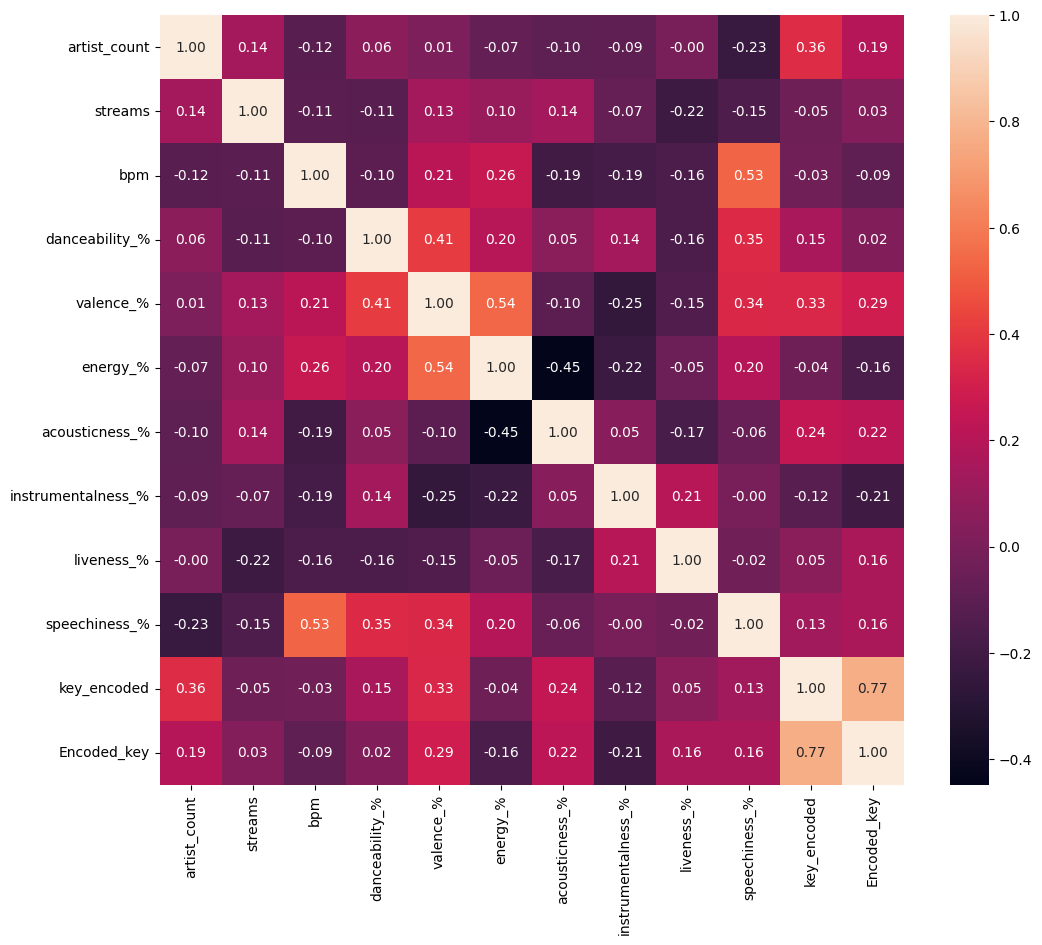

In [99]:
#Create df based only on pop genre
danceDF = spotifyCombined[spotifyCombined['track_genre'].isin(['dance'])]
danceDF = danceDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
danceStandard = pd.DataFrame(scaler.fit_transform(danceDF), columns=danceDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(danceDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Again, not very high correlation values. Will check Lasso Cross Validation

In [100]:
#Train the model
X = danceStandard.drop('streams', axis=1)
y = danceStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
danceLasso = danceStandard[negFeat + ['streams']]

Best alpha: 0.3467334223639891
Mean Squared Error: 1.8771712692446538
               Feature   Coefficient
0         artist_count  6.444403e-17
1                  bpm -0.000000e+00
2       danceability_% -0.000000e+00
3            valence_%  0.000000e+00
4             energy_%  0.000000e+00
5       acousticness_%  0.000000e+00
6   instrumentalness_% -0.000000e+00
7           liveness_% -0.000000e+00
8        speechiness_% -0.000000e+00
9          key_encoded  0.000000e+00
10         Encoded_key  0.000000e+00


/Users/joeybeightol/Documents/DU_Data_Science/2024/1_Winter_Quarter/COMP4447/comp4447Env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004208414022873086, tolerance: 0.0023079968611634683
  model = cd_fast.enet_coordinate_descent_gram(
/Users/joeybeightol/Documents/DU_Data_Science/2024/1_Winter_Quarter/COMP4447/comp4447Env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007433351574343661, tolerance: 0.0023079968611634683
  model = cd_fast.enet_coordinate_descent_gram(
/Users/joeybeightol/Documents/DU_Data_Science/2024/1_Winter_Quarter/COMP4447/comp4447Env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to

Still no strong features

### Hip Hop

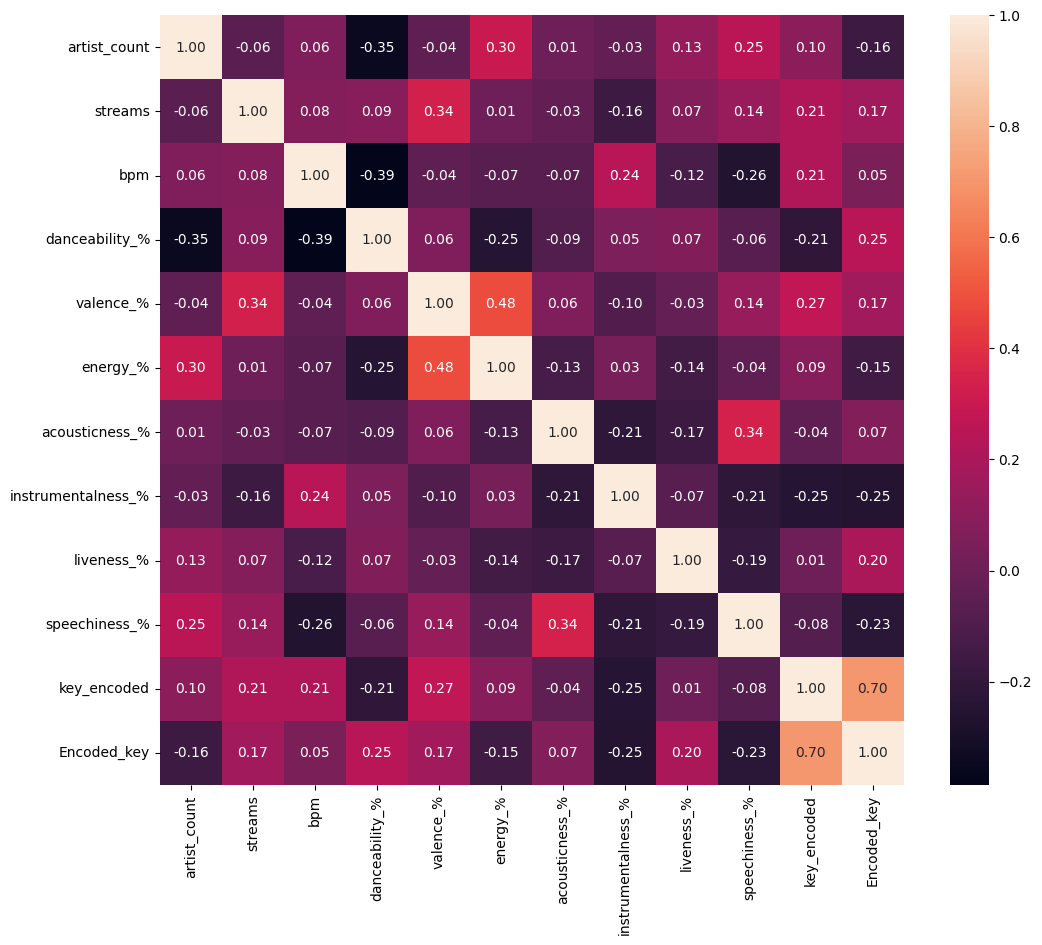

In [101]:
#Create df based only on pop genre
hhDF = spotifyCombined[spotifyCombined['track_genre'].isin(['hip-hop'])]
hhDF = hhDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
hhStandard = pd.DataFrame(scaler.fit_transform(hhDF), columns=hhDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(hhDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Valence is higher in this one. But a score of 0.34 is still not very strong. Will run Lasso Cross Validation

In [102]:
#Train the model
X = hhStandard.drop('streams', axis=1)
y = hhStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
hhLasso = hhStandard[negFeat + ['streams']]

Best alpha: 0.339699876175211
Mean Squared Error: 0.642470033764113
               Feature  Coefficient
0         artist_count         -0.0
1                  bpm          0.0
2       danceability_%          0.0
3            valence_%          0.0
4             energy_%         -0.0
5       acousticness_%          0.0
6   instrumentalness_%         -0.0
7           liveness_%          0.0
8        speechiness_%          0.0
9          key_encoded          0.0
10         Encoded_key          0.0


Still no strong features

### K-Pop

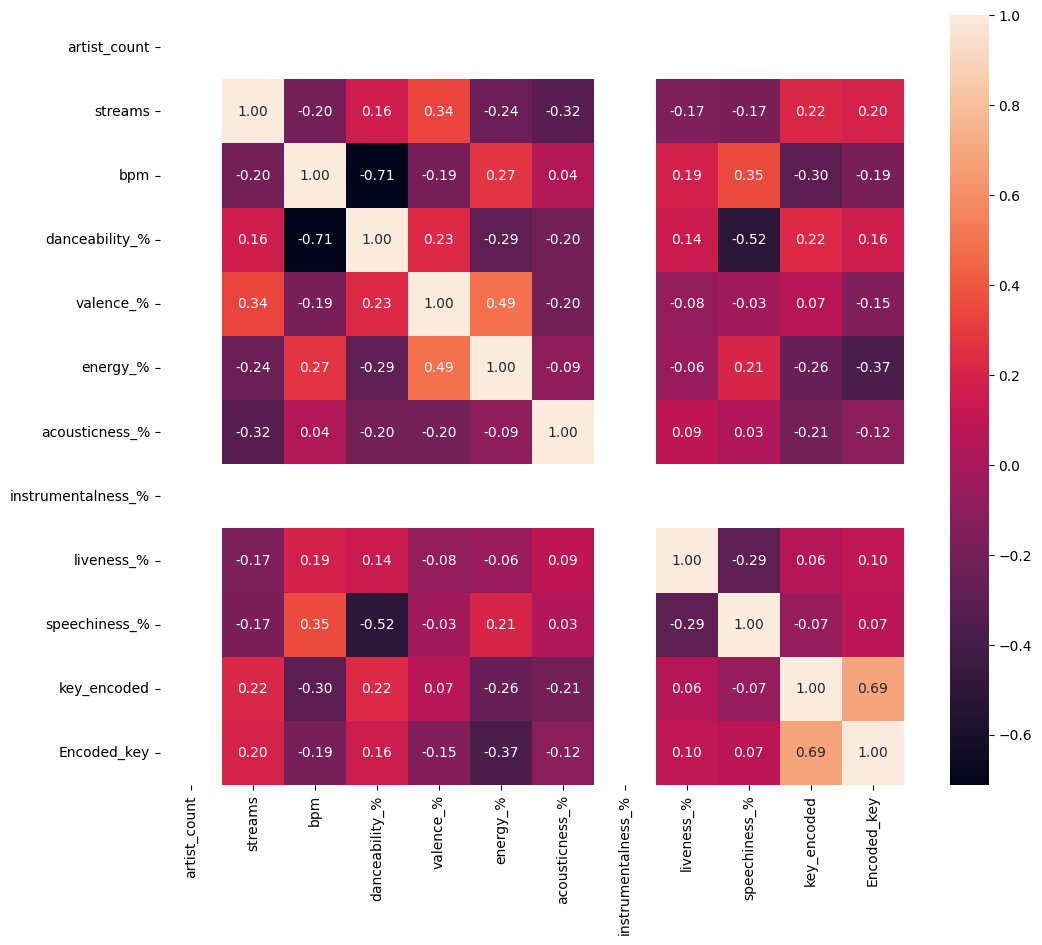

In [103]:
#Create df based only on pop genre
kpopDF = spotifyCombined[spotifyCombined['track_genre'].isin(['k-pop'])]
kpopDF = kpopDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
kpopStandard = pd.DataFrame(scaler.fit_transform(kpopDF), columns=kpopDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(kpopDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Again valence is high, but still not incredibly strong. Let's check Lasso Cross Validation

In [104]:
#Train the model
X = kpopStandard.drop('streams', axis=1)
y = kpopStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0.1]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
kpopLasso = kpopStandard[negFeat + ['streams']]

Best alpha: 0.09377895220232463
Mean Squared Error: 0.9653418747897439
               Feature  Coefficient
0         artist_count     0.000000
1                  bpm    -0.000000
2       danceability_%     0.000000
3            valence_%     0.603031
4             energy_%    -0.346632
5       acousticness_%    -0.526961
6   instrumentalness_%     0.000000
7           liveness_%    -0.051317
8        speechiness_%    -0.000000
9          key_encoded     0.000000
10         Encoded_key     0.014165


Looks like we were able to get some influential coefficients, let's build on this. Let's use the values from the Lasso CV to run different regression analysis

In [105]:
# Extract features (X) and target values (y) from the dataframe
X =  kpopLasso.drop('streams', axis=1)
y = kpopLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 5.10192888080169
Random Forrest Mean Squared Error: 0.09677554786046291
Tree Regression Mean Squared Error: 0.34235897678569105


Random Forrest was very good here. Let's extract the data and see what predictors were the best for K-Pop

In [106]:
# Extract feature importance scores
feature_importance = rf_regressor.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(kpopLasso.columns, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N most important features
top_n = len(rf_regressor.feature_importances_)  # Number of top features to display
print(f"Top {top_n} most important features:")
for i in range(top_n):
    feature_name, importance_score = sorted_feature_importance[i]
    print(f"{feature_name}: Importance Score = {importance_score:.4f}")

Top 3 most important features:
acousticness_%: Importance Score = 0.3671
energy_%: Importance Score = 0.3300
valence_%: Importance Score = 0.3029


### Latin

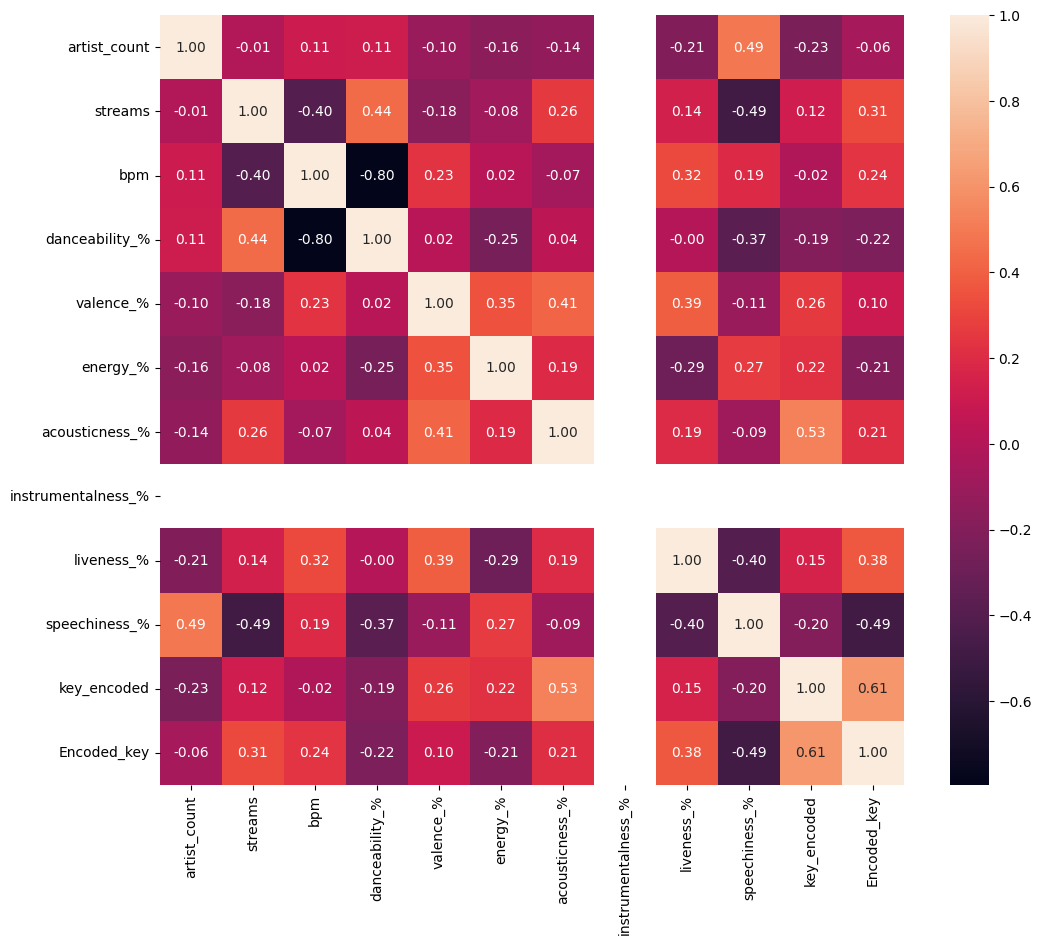

In [107]:
#Create df based only on Latin genre
latinDF = spotifyCombined[spotifyCombined['track_genre'].isin(['latin'])]
latinDF = latinDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
latinStandard = pd.DataFrame(scaler.fit_transform(latinDF), columns=latinDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(latinDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Latin has some decent correlation values, but still not very strong. Will again run Lasso CV

In [108]:
#Train the model
X = latinStandard.drop('streams', axis=1)
y = latinStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
latinLasso = latinStandard[negFeat + ['streams']]

Best alpha: 0.4197977723613463
Mean Squared Error: 1.6674730007418745
               Feature  Coefficient
0         artist_count    -0.000000
1                  bpm    -0.075971
2       danceability_%     0.000000
3            valence_%    -0.124208
4             energy_%     0.000000
5       acousticness_%     0.000000
6   instrumentalness_%     0.000000
7           liveness_%    -0.000000
8        speechiness_%    -0.000000
9          key_encoded     0.000000
10         Encoded_key     0.000000


Similarly, have some influential values from Lasso CV. Let's run the same regression analysis

In [109]:
# Extract features (X) and target values (y) from the dataframe
X =  latinLasso.drop('streams', axis=1)
y = latinLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 2.994249923458512
Random Forrest Mean Squared Error: 3.1735103955594823
Tree Regression Mean Squared Error: 2.004365092872625


All have high MSE values. This shows us that it is not very predictive

### Latino

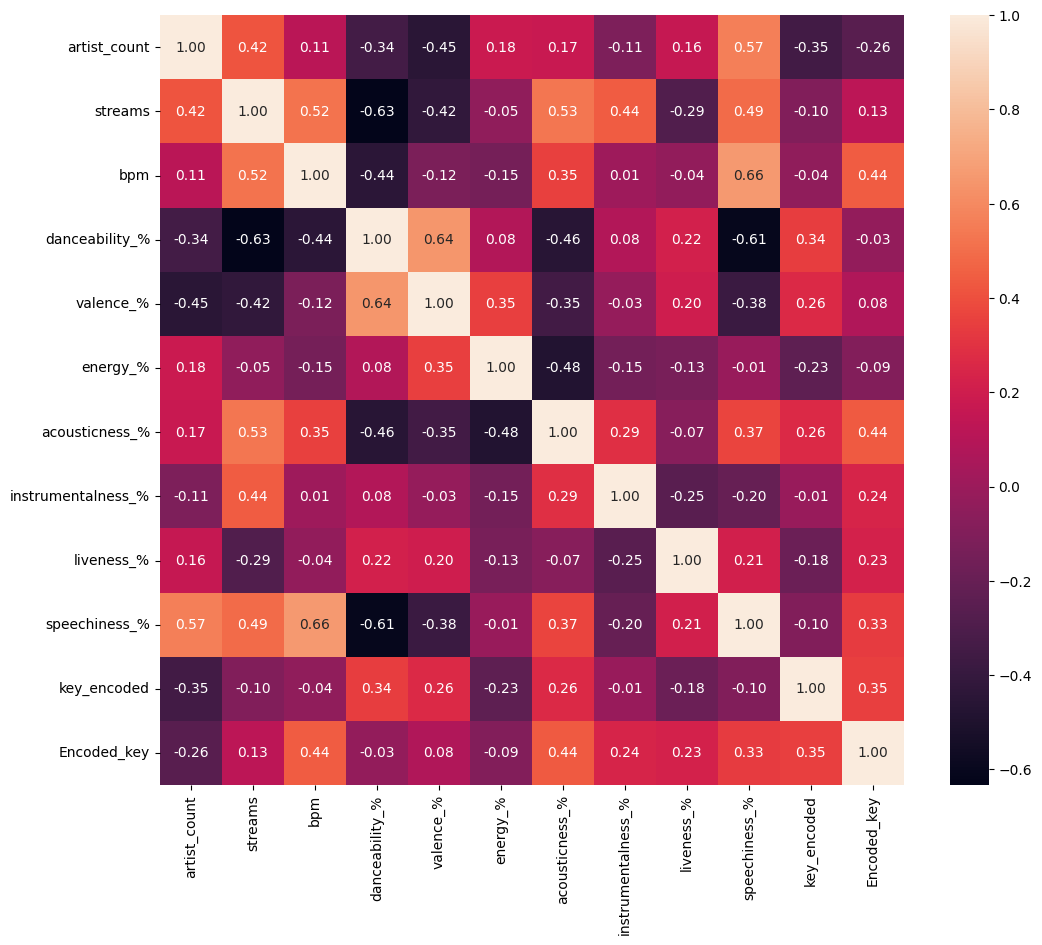

In [110]:
#Create df based only on pop genre
latinoDF = spotifyCombined[spotifyCombined['track_genre'].isin(['latino'])]
latinoDF = latinoDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
latinoStandard = pd.DataFrame(scaler.fit_transform(latinoDF), columns=latinoDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(latinoDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [111]:
#Train the model
X = latinoStandard.drop('streams', axis=1)
y = latinoStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
latinoLasso = latinoStandard[negFeat + ['streams']]

Best alpha: 0.6686572689073627
Mean Squared Error: 1.516294274281356
               Feature  Coefficient
0         artist_count          0.0
1                  bpm          0.0
2       danceability_%         -0.0
3            valence_%         -0.0
4             energy_%         -0.0
5       acousticness_%          0.0
6   instrumentalness_%          0.0
7           liveness_%         -0.0
8        speechiness_%          0.0
9          key_encoded         -0.0
10         Encoded_key          0.0


No good predictions here

### Indie-pop

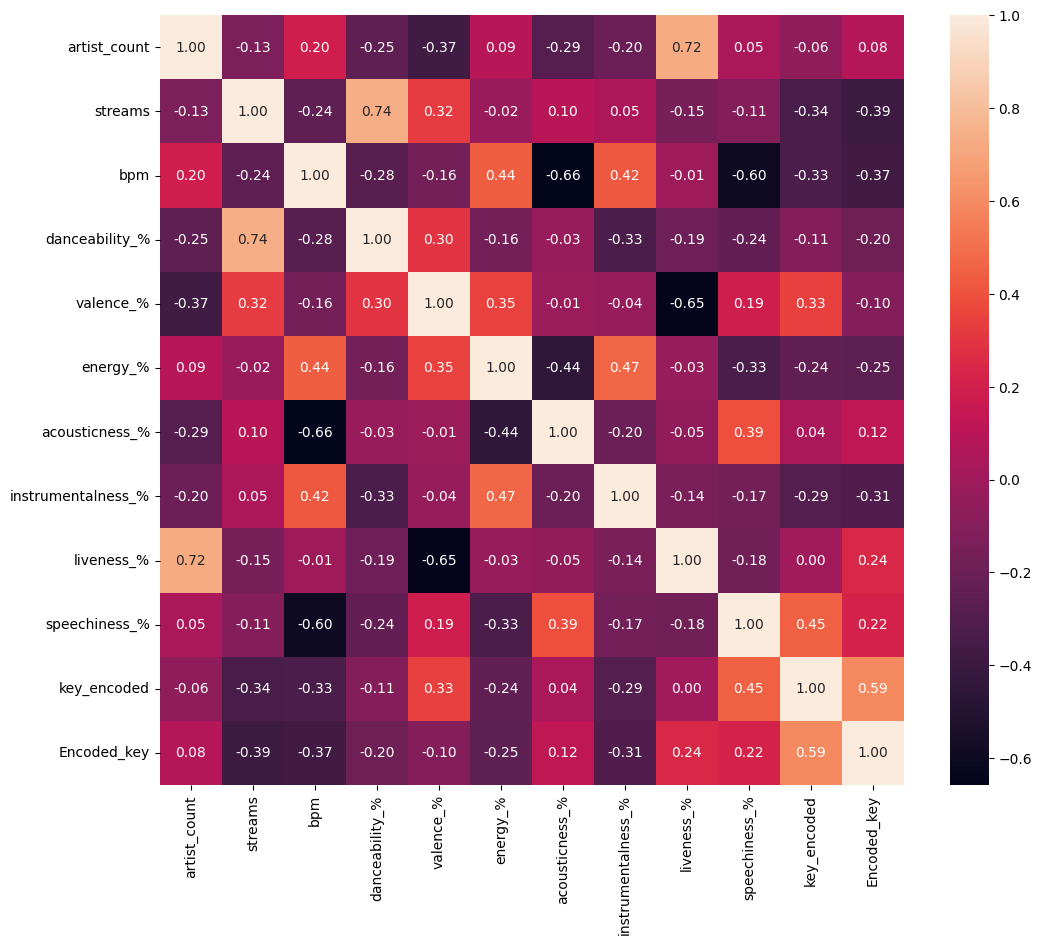

In [112]:
#Create df based only on pop genre
ipopDF = spotifyCombined[spotifyCombined['track_genre'].isin(['indie-pop'])]
ipopDF = ipopDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
ipopStandard = pd.DataFrame(scaler.fit_transform(ipopDF), columns=ipopDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(ipopDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Danceability is our first high correlating value. Lets run regression analysis using only danceability for Latino genre

In [113]:
# Extract features (X) and target values (y) from the dataframe
X =  ipopStandard[['danceability_%']]
y = ipopStandard['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 3.8909207487830404
Random Forrest Mean Squared Error: 3.882578305325634
Tree Regression Mean Squared Error: 1.9466376260193865


Not very good analysis here with high MSE. Let's take a look at lasso regression

In [114]:
#Train the model
X = ipopStandard.drop('streams', axis=1)
y = ipopStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
ipopLasso = ipopStandard[negFeat + ['streams']]

Best alpha: 0.06328618378033626
Mean Squared Error: 4.35765529771476
               Feature  Coefficient
0         artist_count    -0.000000
1                  bpm     0.000000
2       danceability_%     0.000000
3            valence_%     0.000000
4             energy_%     0.000000
5       acousticness_%    -0.000000
6   instrumentalness_%     0.125784
7           liveness_%     0.000000
8        speechiness_%    -0.042424
9          key_encoded     0.000000
10         Encoded_key     0.000000


Got some predictors here, but strangely, danceability is not one of them. Let's check

In [115]:
# Extract features (X) and target values (y) from the dataframe
X =  ipopLasso.drop('streams', axis=1)
y = ipopLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 4.468971540972175
Random Forrest Mean Squared Error: 4.7882752256444725
Tree Regression Mean Squared Error: 2.149122118932764


Our original analysis with only danceability had better MSE than this.

### Rock

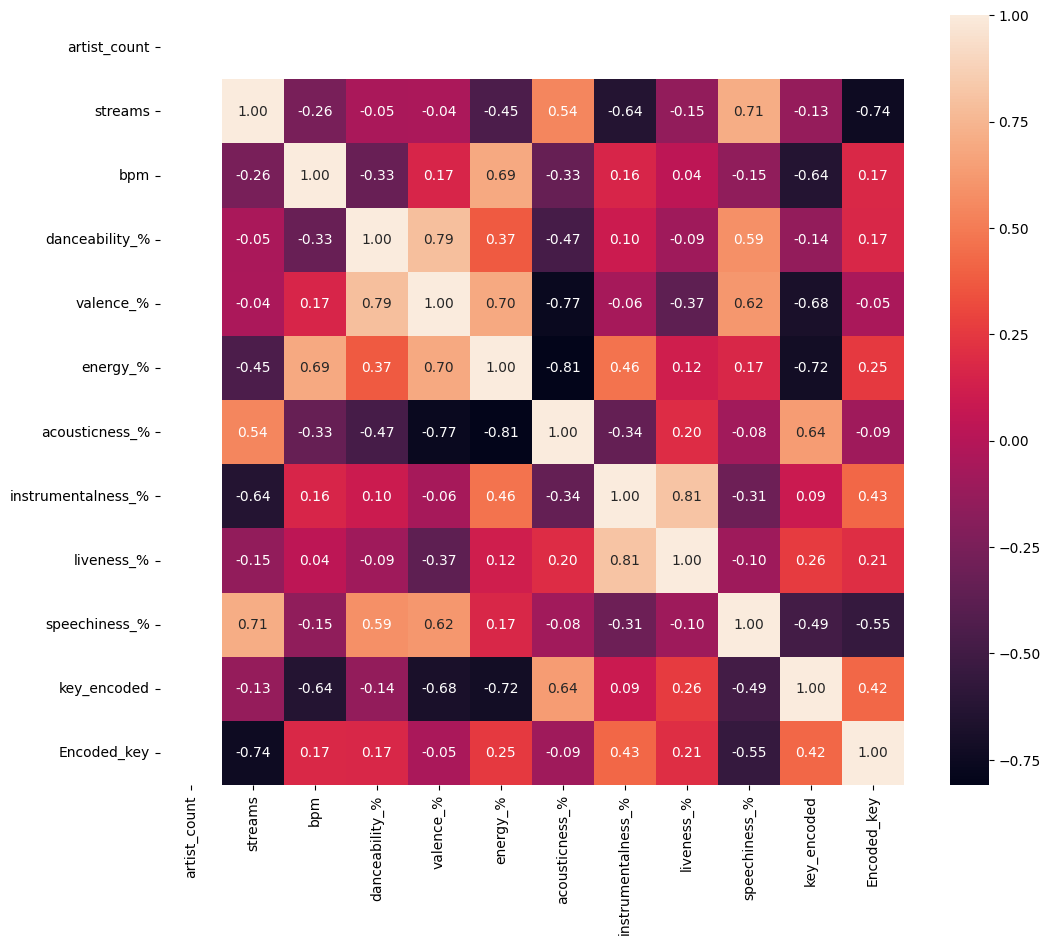

In [116]:
#Create df based only on pop genre
rockDF = spotifyCombined[spotifyCombined['track_genre'].isin(['rock'])]
rockDF = rockDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
rockStandard = pd.DataFrame(scaler.fit_transform(rockDF), columns=rockDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(rockDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Rock has a few high correlating values. Let's run regression analysis using these

In [117]:
# Extract features (X) and target values (y) from the dataframe
X =  rockStandard[['Encoded_key', 'speechiness_%', 'instrumentalness_%', 'acousticness_%', 'energy_%']]
y = rockStandard['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 1.3531963698750857
Random Forrest Mean Squared Error: 1.58858753774637
Tree Regression Mean Squared Error: 1.3162717091333591


Still high MSE which is not very predictive

In [118]:
#Train the model
X = rockStandard.drop('streams', axis=1)
y = rockStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=4)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
rockLasso = rockStandard[negFeat + ['streams']]

Best alpha: 0.000875834932784319
Mean Squared Error: 1.5997759281136434
               Feature  Coefficient
0         artist_count     0.000000
1                  bpm    -0.000000
2       danceability_%    -0.000000
3            valence_%    -0.000000
4             energy_%    -0.099322
5       acousticness_%     0.388971
6   instrumentalness_%    -0.384983
7           liveness_%    -0.000000
8        speechiness_%     0.000000
9          key_encoded     0.000000
10         Encoded_key    -0.000000


Lasso CV has some strong features, let's run analysis on these

In [119]:
# Extract features (X) and target values (y) from the dataframe
X =  rockLasso.drop('streams', axis=1)
y = rockLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 1.5998339423377035
Random Forrest Mean Squared Error: 2.5402303885836717
Tree Regression Mean Squared Error: 2.055632287054489


High MSE and not very predicitve.

## Clustering

Based on our analysis per genre, song features per genre were also not very predicitive. Maybe there is clustering of the data that targets different groups. We can look at cluster analysis using K-means to look at this

Determine optimal amount of clusters

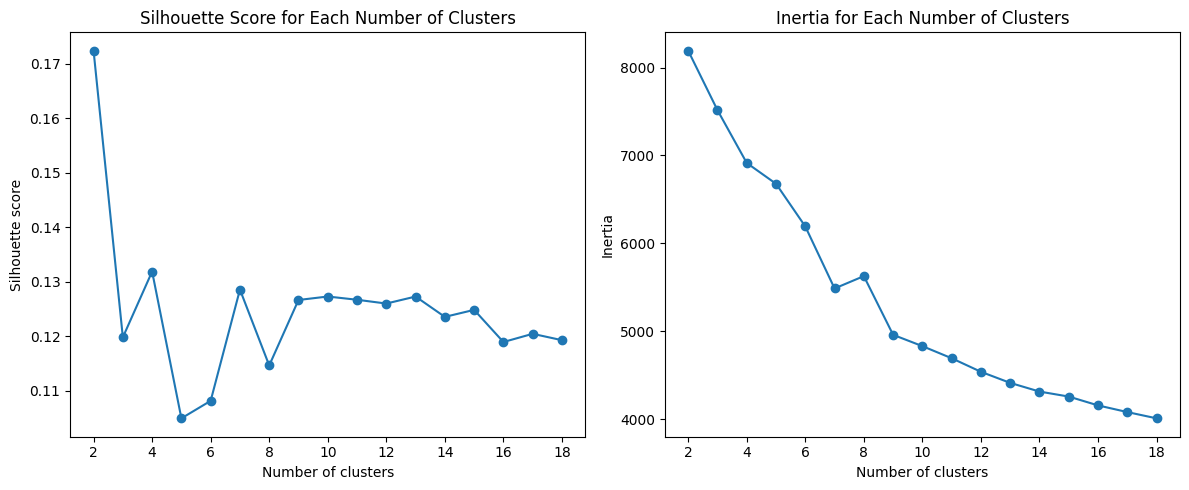

In [120]:
#Remove streams (our response variable)
spotifySmallKmeans = spotifyNumericStandard.drop(columns=['streams'])

# Initialize lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Range of clusters to try
range_of_clusters = range(2, 19)

# Calculate silhouette score and inertia value for each number of clusters
for n_clusters in range_of_clusters:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotifySmallKmeans)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(spotifySmallKmeans, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate inertia value
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_of_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Each Number of Clusters')

# Plot inertia values
plt.subplot(1, 2, 2)
plt.plot(range_of_clusters, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Each Number of Clusters')

plt.tight_layout()
plt.show()

Looks like 7 clusters is the optimal here. It is not very indicative however as the silhouette score is not the highest, but this is where it hops back up and the inertia value has the elbow.

In [121]:
# Instantiate and fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(spotifySmallKmeans)
# Get cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=spotifySmallKmeans.columns)

# Predict cluster labels for each customer
cluster_labels = kmeans.predict(spotifySmallKmeans)
spotifySmallKmeans = spotifySmallKmeans * spotifyNumericDF.drop(columns=['streams','artist_count']).std() + spotifyNumericDF.drop(columns=['streams','artist_count']).mean()
spotifySmallKmeans['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_summary = spotifySmallKmeans.groupby('Cluster').agg({
    'bpm': ['mean', 'min', 'max', 'count'],
    'danceability_%': ['mean', 'min', 'max', 'count'],
    'valence_%': ['mean', 'min', 'max', 'count'],
    'energy_%': ['mean', 'min', 'max', 'count'],
    'acousticness_%': ['mean', 'min', 'max', 'count'],
    'instrumentalness_%': ['mean', 'min', 'max', 'count'],
    'liveness_%': ['mean', 'min', 'max', 'count'],
    'speechiness_%': ['mean', 'min', 'max', 'count'],
    'key_encoded': ['mean', 'min', 'max', 'count'],
}).reset_index()

print("\nCluster Summary:")
display(cluster_summary)


Cluster Summary:


Cluster         bpm                              danceability_%             \
                 mean        min         max count           mean        min   
0       0  117.765836  77.976549  192.036534   177      76.807435  48.990547   
1       1  120.158153  76.976023  189.034955   207      73.520355  40.986337   
2       2  122.764809  78.977076  180.030220    17      60.349461  33.982654   
3       3  118.817904  64.969709  206.043900   161      53.837816  22.976866   
4       4  117.316683  66.970761  206.043900    72      66.263519  32.982128   
5       5  130.250346  72.973919  204.042848   203      59.128883  30.981075   
6       6  129.301787  70.972866  196.038638   114      73.714075  45.988968   

                    valence_%  ... liveness_%       speechiness_%             \
         max count       mean  ...        max count          mean        min   
0  95.014751   177  68.285724  ...  46.014629   177      7.897125   1.995716   
1  96.015277   207  68.235915  ...  41.011998   207      7.230353   2.996242   
2  92.013172    17  32.225218  ...  30.006210    17      5.409276   2.996242   
3  78.005806   161  37.365298  ...  64.024100   161      6.619265   1.995716   
4  92.013172    72  52.542275  ...  97.041464    72      8.290693   2.996242   
5  88.011067   203  31.413142  ...  41.011998   203      6.475905   1.995716   
6  95.014751   114  52.035430  ...  53.018312   114     32.292351  20.005187   

                   key_encoded                             
         max count        mean       min        max count  
0  24.007292   177    2.229789 -0.003024   6.000133   177  
1  29.009923   207    8.972711  6.000133  11.002764   207  
2   9.999925    17    5.941279 -0.003024  11.002764    17  
3  38.014658   161    5.894488 -0.003024  11.002764   161  
4  30.010449    72    7.014556 -0.003024  11.002764    72  
5  29.009923   203    5.216470 -0.003024  11.002764   203  
6  64.028339   114    5.254127 -0.003024  11.002764   114  

[7 rows x 37 columns]

# Conclusion Based on Joined Dataset Exploration and Analysis

Based on out analysis, we cannot conclude that song certain song features relate to the amounbt of streams the song has. Further analysis will need to be conducted. It would be interesting to see with a larger dataset for genres. Having small datasets for genre based analysis could lead to invalid results, so more data should be collected there. It would also be interesting to see if we can conduct analysis on popularity as streams are all time streams and could be effected for how long the song has been out. Finally, further analysis in clustering per genre would be interesting to look at.

# References and Links

Automatic Music Popularity Prediction System​

Stanford University. (2015). Automatic Music Popularity Prediction System: https://cs229.stanford.edu/proj2015/140_report.pdf​

Big Data Could Help Predict the Next Chart-Topping Hit​

Carleton University. (2019, February 1). Big Data Could Help Predict the Next Chart-Topping Hit [News article]. https://newsroom.carleton.ca/story/big-data-predict-song-popularity/​

Top Spotify Songs 2023​

Nelsiriyawithana, Y. (n.d.). Top Spotify Songs 2023. [Dataset]. https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023​

Spotify Tracks Dataset​

Maharishi Pandya. (n.d.). Spotify Tracks Dataset. [Dataset]. https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset​

Git: https://github.com/joey-beightol/spotify_stream_analysis